Opgave 2 

In [1]:
#Gebruikte bibliotheken
import pandas as pd                   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                  
import statsmodels.api as sm           
import statsmodels.formula.api as smf  
import statsmodels.stats.api as sms    
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.regression as sr
import statsmodels as st 
from scipy import stats  

In [2]:
#Gebruikte dataset inladen
studenten=pd.read_csv('studenten.csv')
studenten

,studie,gemiddelde_cijfer,cijfer_studiehouding,uren_zelfstudie,uren_activiteiten,reisafstand,woonsituatie,eigen_studieruimte,situatie_ouders,niveau_VO,cijfer_NL,cijfer_EN,cijfer_WIS,type_WIS
0,Accountancy,6.86,7,12,11,8.4,uitwonend,ja,samenwonend,vmbo,5,8,8,NaN
1,Finance & Control,8.70,9,20,11,21.6,thuiswonend,ja,samenwonend,vmbo,6,6,6,NaN
2,Accountancy,10.00,10,19,16,16.1,thuiswonend,ja,gescheiden,havo,8,6,5,A
3,Accountancy,7.88,8,13,9,15.0,thuiswonend,ja,samenwonend,vmbo,5,7,8,NaN
4,Accountancy,6.13,7,13,14,12.8,thuiswonend,nee,samenwonend,vmbo,7,6,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,Accountancy,6.64,5,13,13,10.9,thuiswonend,ja,samenwonend,havo,5,7,6,A
313,Accountancy,8.51,8,16,8,13.1,thuiswonend,ja,samenwonend,havo,7,7,5,A
314,Finance & Control,5.73,5,12,12,12.7,thuiswonend,ja,samenwonend,vmbo,6,6,5,NaN
315,Accountancy,6.88,8,6,16,14.2,thuiswonend,ja,samenwonend,vmbo,7,5,6,NaN


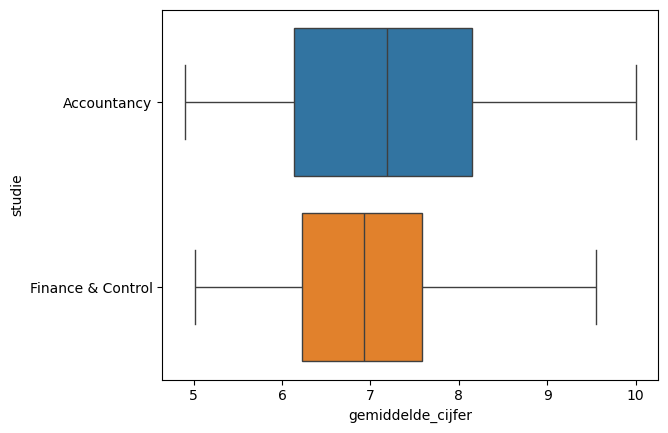

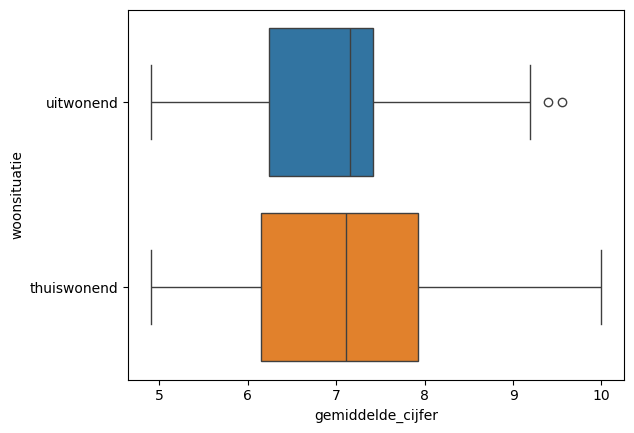

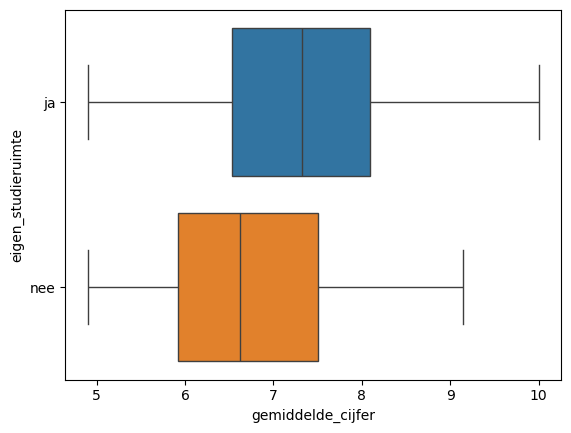

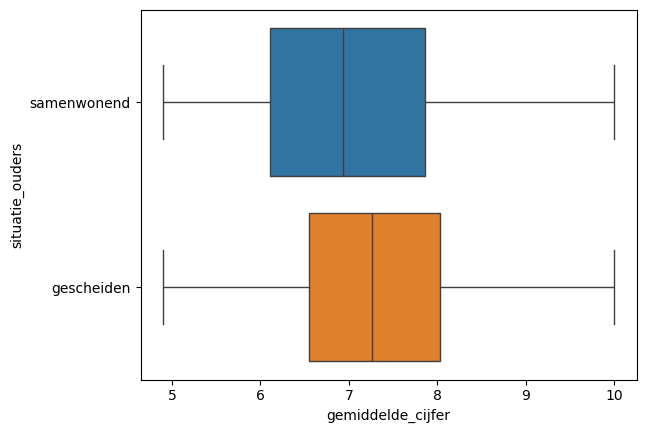

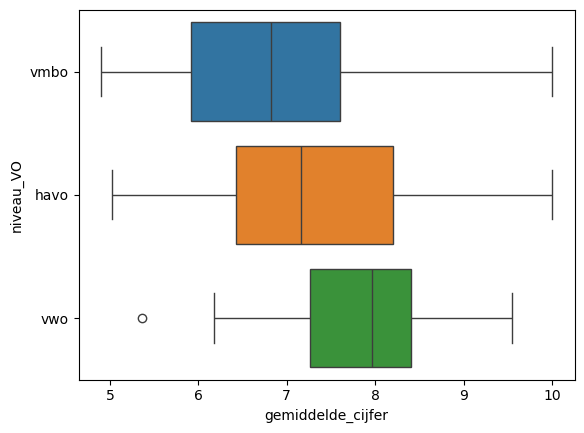

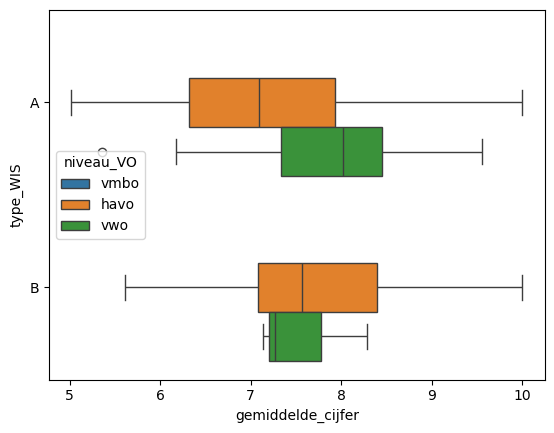

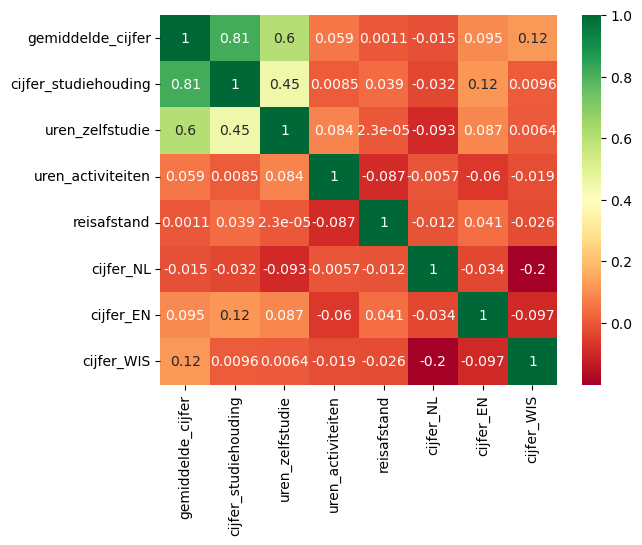

In [3]:
# Boxplots om de verdeling van variabelen per categorie te bekijken
sns.boxplot(x=studenten['gemiddelde_cijfer'], y=studenten['studie'], hue=studenten['studie'], orient="h")
plt.show() 

sns.boxplot(x=studenten['gemiddelde_cijfer'], y=studenten['woonsituatie'], hue=studenten['woonsituatie'], orient="h")
plt.show()

sns.boxplot(x=studenten['gemiddelde_cijfer'], y=studenten['eigen_studieruimte'], hue=studenten['eigen_studieruimte'], orient="h")
plt.show()

sns.boxplot(x=studenten['gemiddelde_cijfer'], y=studenten['situatie_ouders'], hue=studenten['situatie_ouders'], orient="h")
plt.show()  

sns.boxplot(x=studenten['gemiddelde_cijfer'], y=studenten['niveau_VO'], hue=studenten['niveau_VO'], orient="h")
plt.show()   
 
sns.boxplot(x=studenten['gemiddelde_cijfer'], y=studenten['type_WIS'], hue=studenten['niveau_VO'], orient="h")
plt.show() 


# Heatmap om correlaties tussen numerieke variabelen te bekijken
numeric_cols = studenten.select_dtypes(include=['float64', 'int64']).columns
numeric_corr = studenten[numeric_cols].corr()
heat = sns.heatmap(numeric_corr, cmap="RdYlGn", annot=True)
plt.show()



Uit deze analyses komen naar voren dat de categorische variabelen: studiekeuze, eigen studieruimte, situatie_ouders en niveau_VO een sterk invloed hebben op de gemiddelde cijfer. Verder komt uit de analyses naar voren dat de nummerieke variabelen: uren_zelfstudie en cijfer_studiehouding impact hebben op de gemiddelde cijfer. 

<Axes: xlabel='uren_zelfstudie', ylabel='gemiddelde_cijfer'>

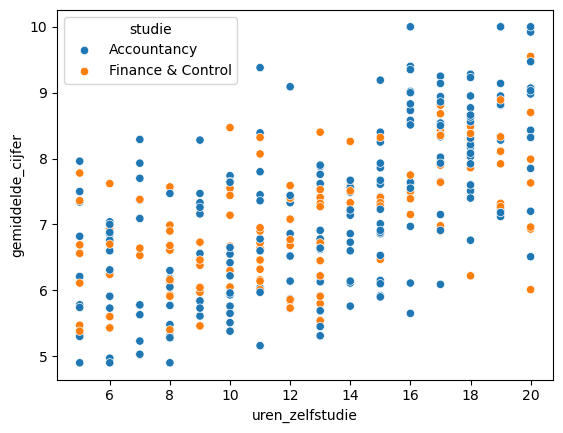

In [4]:
sns.scatterplot(y=studenten.gemiddelde_cijfer, x=studenten.uren_zelfstudie, hue=studenten['studie']) 

<Axes: xlabel='cijfer_studiehouding', ylabel='gemiddelde_cijfer'>

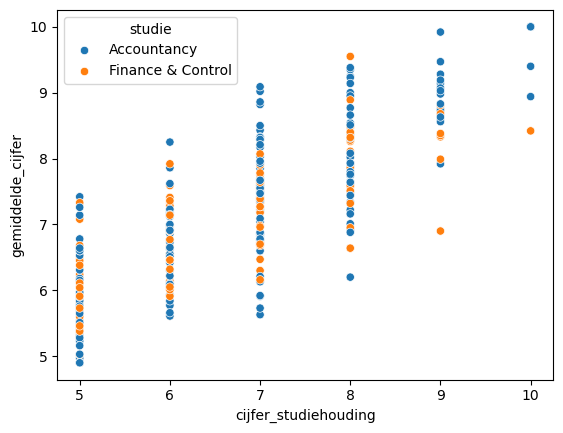

In [5]:
sns.scatterplot(y=studenten.gemiddelde_cijfer, x=studenten.cijfer_studiehouding, hue=studenten['studie']) 

<Axes: xlabel='cijfer_WIS', ylabel='gemiddelde_cijfer'>

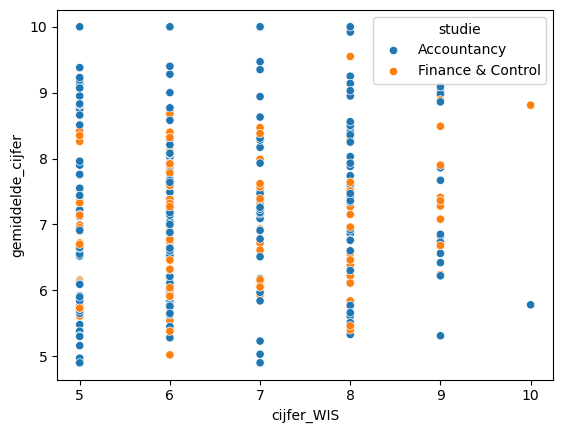

In [6]:
sns.scatterplot(y=studenten.gemiddelde_cijfer, x=studenten.cijfer_WIS, hue=studenten['studie']) 

In [7]:
#Dummy variabelen aanmaken
studenten['niveau_VO'] = studenten.niveau_VO.map({'vmbo':0,'havo': 1,'vwo':2}) 
studenten['woonsituatie'] = studenten.woonsituatie.map({'uitwonend':0,'thuiswonend': 1}) 
studenten['situatie_ouders'] = studenten.situatie_ouders.map({'samenwonend':0,'gescheiden': 1}) 
studenten['eigen_studieruimte'] = studenten.eigen_studieruimte.map({'ja':0,'nee': 1})  
studenten['type_WIS'] = studenten['type_WIS'].fillna("geen") 
studenten['type_WIS'] = studenten.type_WIS.map({'geen':0,'A': 1,'B':2})


print(studenten['niveau_VO'])
print(studenten['woonsituatie'])
print(studenten['situatie_ouders'])
print(studenten['eigen_studieruimte']) 
print(studenten['type_WIS'])

0      0
1      0
2      1
3      0
4      0
      ..
312    1
313    1
314    0
315    0
316    1
Name: niveau_VO, Length: 317, dtype: int64
0      0
1      1
2      1
3      1
4      1
      ..
312    1
313    1
314    1
315    1
316    0
Name: woonsituatie, Length: 317, dtype: int64
0      0
1      0
2      1
3      0
4      0
      ..
312    0
313    0
314    0
315    0
316    0
Name: situatie_ouders, Length: 317, dtype: int64
0      0
1      0
2      0
3      0
4      1
      ..
312    0
313    0
314    0
315    0
316    0
Name: eigen_studieruimte, Length: 317, dtype: int64
0      0
1      0
2      1
3      0
4      0
      ..
312    1
313    1
314    0
315    0
316    1
Name: type_WIS, Length: 317, dtype: int64


Uit de plots, die zijn gemaakt, blijkt er een lineair verband te zijn tussen het gemiddelde cijfer en de niveau voorgezet niveau en het gemiddelde cijfer en cijfer studiehouding. Dit is verder getest op basis van een lineair regressiemodel. Hieruit bleek er een extreem kleine p-waarde te zijn. Dit houdt in dat onder de aanname van de nulhypothese, dat er geen verband is, dat de kans om een extremer verband waar te nemen verwaarloosbaar is. Dus de nulhypothese wordt verworpen. 

stap 4:  
Hier ga je daadwerkelijk schatten.

Je kunt daarbij op basis van de correlaties beginnen met een klein model en dat steeds groter maken, zolang de Adjusted R2
blijft toenemen, of je begint met een vol model en haalt steeds variabelen weg totdat de Adjusted R2

gaat afnemen.

Bij de keuzes van de toe te voegen of te verwijderen variabelen maak je (ook) gebruik van de schattingsresultaten zelf (o.a. p
-waarden) en de toetsen op validatie van je model.

In [8]:
# Schattingen doen

# Eerst stellen we een model op met Ordinary Least Squares (OLS)
model = smf.ols('gemiddelde_cijfer ~ cijfer_studiehouding + niveau_VO +  uren_zelfstudie + cijfer_WIS + eigen_studieruimte + studie', data=studenten)

# Daarna schatten we het model
regres = model.fit()

# Print de samenvatting van de regressieresultaten
print(regres.summary())

# Met 'regres' kunnen we verder analyses uitvoeren, zoals het interpreteren van de coëfficiënten en het maken van voorspellingen.

                            OLS Regression Results                            
Dep. Variable:      gemiddelde_cijfer   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     515.6
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          5.21e-158
Time:                        09:48:24   Log-Likelihood:                -114.06
No. Observations:                 317   AIC:                             242.1
Df Residuals:                     310   BIC:                             268.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

stap 5:  
Na elke schatting toets je of je model wel valide is:

    Zijn de residuen (bij benadering) normaal verdeeld: ^ε∼N

.
Hebben de residuen een gemiddelde van nul (centraliteit): E(^ε)=0
.
Hebben de residuen een variantie onafhankelijk van de y
-waarden (homoscedasticiteit): Var(^ε)=σ
.
Zijn de onafhankelijke variabelen niet te veel onderling gecorreleerd (multicolineariteit).

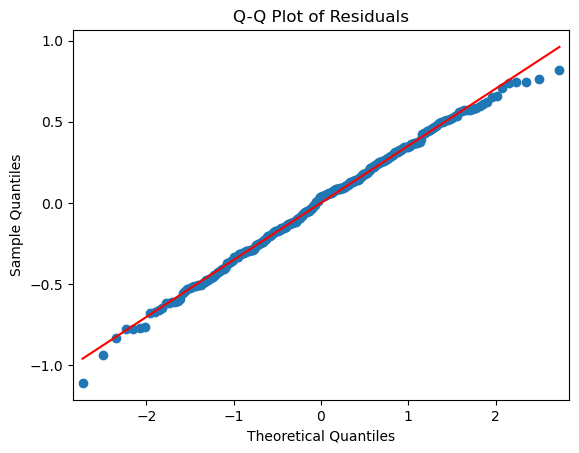

Shapiro-Wilk statistic 0.9955, p-value: 0.4887
t-test statistic for central tendency 0.0000 p-value: 1.0000


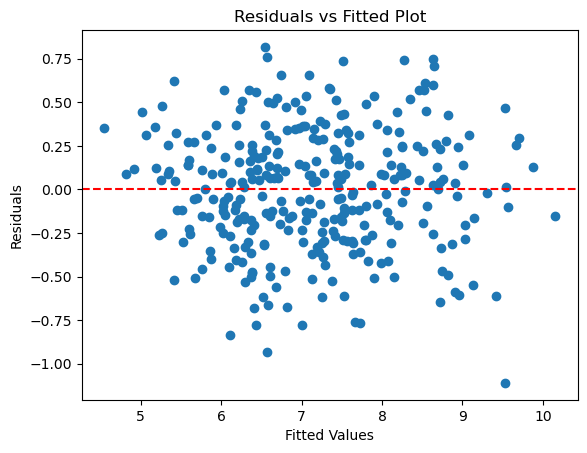

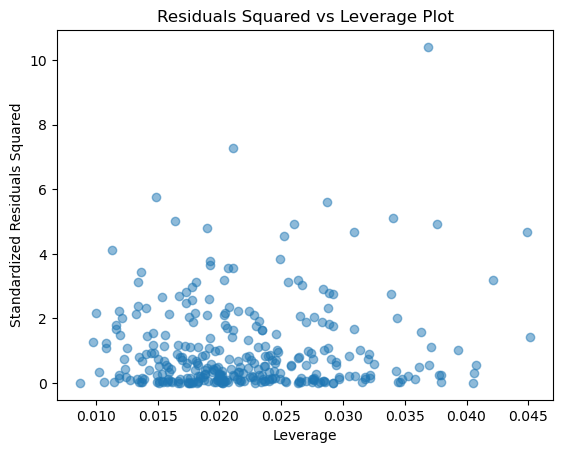

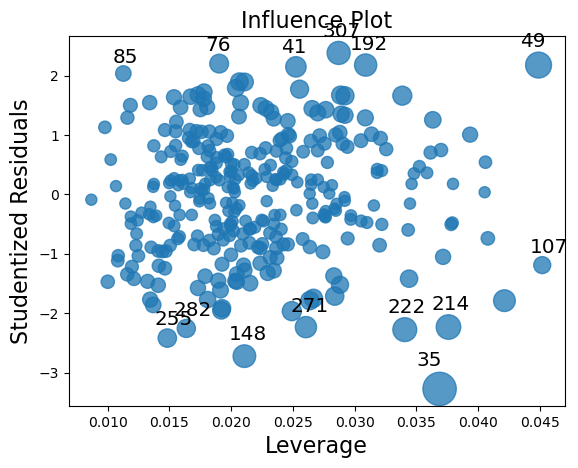

Breusch-Pagan statistic: 6.3451, p-value=0.3857
VIF values:
cijfer_studiehouding : 31.528420414530466
uren_zelfstudie : 11.258911025939067
uren_activiteiten : 12.342344034870424
reisafstand : 7.333275773990973
cijfer_NL : 24.20711329071947
cijfer_EN : 33.13616842472957
cijfer_WIS : 19.86275268176509


In [9]:

# Q-Q plot
sm.qqplot(regres.resid, line='r')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(regres.resid)
print("Shapiro-Wilk statistic {:.4f}, p-value: {:.4f}".format(shapiro_test.statistic, shapiro_test.pvalue))
 
# Uit de p-waarde volgt dat het groter is dan de significatieniveau. Dat houdt in dat de nulhypothese behouden wordt. Als de nulhypothese is datr er geen verband is 
    
    
    
# Test for central tendency
t_test = stats.ttest_1samp(regres.resid, 0)
print("t-test statistic for central tendency {:.4f} p-value: {:.4f}".format(t_test.statistic, t_test.pvalue))

# Residuals vs Fitted plot
plt.scatter(regres.fittedvalues, regres.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Leverage vs Residuals squared plot
influence = regres.get_influence()
leverage = influence.hat_matrix_diag
resid_stud = influence.resid_studentized_internal

plt.scatter(leverage, resid_stud**2, alpha=0.5)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals Squared')
plt.title('Residuals Squared vs Leverage Plot')
plt.show()

sm.graphics.influence_plot(regres, size=24, criterion="cooks") 
plt.show()

# Breusch Pagan test
brpg = sms.het_breuschpagan(regres.resid, model.exog)
print('Breusch-Pagan statistic: {:.4f}, p-value={:.4f}'.format(brpg[0],brpg[1]))

# Check for multicollinearity
# Hier moet je zelf de matrix X vullen met alle numerieke variabelen die
# je hebt gebruikt als verklarende (exogene) variabelen. Als je categorale 
# variabelen hebt gebruikt moet je die zelf omzetten naar dummy-variabelen

X = studenten[['cijfer_studiehouding', 'uren_zelfstudie', 'uren_activiteiten', 'reisafstand', 'cijfer_NL', 'cijfer_EN', 'cijfer_WIS']]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF values:")
for i, col in enumerate(X.columns): 
    print(col, ":", vif[i])

#### conclusie: volgens de shapiro_wilk toets lijkt de verdeling niet normaal verdeeld te zijn dus het model voldoet niet aan de voorwaarde normaliteit.